## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from pathlib import Path
import glob
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import copy
import pandas as pd
import numpy as np
import torch
from torch import nn

from sklearn.metrics import roc_auc_score

os.environ["WANDB_SILENT"] = "true"

from owkin.training import train, RocLoss
from owkin.dataset import build_dataset
from owkin.models.mono_models import MLP, SVM
from owkin.models.aggregators import SmoothMaxAggregator, MaxAggregator

## MLP MODELS

### Study params

#### Num layer = 2

In [120]:
num_layers = 2
inside_dim = 512

mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)

mono_batch_size = 64

normalizer_type = "expo_lambda"

list_val_center = ["C_1", "C_2", "C_5"]
list_mono_lr = [3e-6, 1e-5, 3e-5, 1e-4]
list_criterion = [nn.BCELoss(), RocLoss()]
list_wd = [0, 1e-3, 3e-3, 1e-2, 3e-2]

all_val_scores = []
all_paths = []
all_params = []
for mono_lr in list_mono_lr:
    for criterion in list_criterion:
        val_score = 0
        paths = []
        params = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
        for val_center in list_val_center:
            run_name = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{mono_batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
            PATH_DIR = f"../saved_models/{run_name}"

            for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
                val_score += float(model_path.name[-8:-3])
            paths.append(f"{PATH_DIR}/{model_path.name}")

        val_score /= len(list_val_center)

        all_val_scores.append(val_score)
        all_paths.append(paths)
        all_params.append(params)

In [121]:
all_paths = [x for _, x in sorted(zip(all_val_scores, all_paths))]
all_params = [x for _, x in sorted(zip(all_val_scores, all_params))]
all_val_scores.sort()

all_paths.reverse()
all_val_scores.reverse()
all_params.reverse()

In [122]:
all_params[:5]

['MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-06',
 'MLP/nl_2_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_1e-05',
 'MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_1e-04',
 'MLP/nl_2_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_1e-04',
 'MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-05']

In [123]:
for val_score, params in zip(all_val_scores, all_params[:5]):
    print(f"val_score:{'{:.4f}'.format(val_score)}, {params}")

val_score:0.6887, MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-06
val_score:0.6870, MLP/nl_2_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_1e-05
val_score:0.6870, MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_1e-04
val_score:0.6860, MLP/nl_2_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_1e-04
val_score:0.6840, MLP/nl_2_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-05


In [124]:
all_paths[:5]

[['../saved_models/MLP/nl_2_id_512/BCELoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_3e-06/best_epoch_1560_score_0.653.pt',
  '../saved_models/MLP/nl_2_id_512/BCELoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_3e-06/best_epoch_197_score_0.688.pt',
  '../saved_models/MLP/nl_2_id_512/BCELoss/nt_expo_lambda/vc_C_5/bs_64/wd_0e+00/lr_3e-06/best_epoch_334_score_0.725.pt'],
 ['../saved_models/MLP/nl_2_id_512/RocLoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_1e-05/best_epoch_10_score_0.658.pt',
  '../saved_models/MLP/nl_2_id_512/RocLoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_1e-05/best_epoch_94_score_0.683.pt',
  '../saved_models/MLP/nl_2_id_512/RocLoss/nt_expo_lambda/vc_C_5/bs_64/wd_0e+00/lr_1e-05/best_epoch_112_score_0.720.pt'],
 ['../saved_models/MLP/nl_2_id_512/BCELoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_1e-04/best_epoch_19_score_0.654.pt',
  '../saved_models/MLP/nl_2_id_512/BCELoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_1e-04/best_epoch_5_score_0.681.pt',
  '../saved_models/MLP/nl_2_id_512

#### Num layers = 5

In [ ]:
num_layers = 5
inside_dim = 512

mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)

mono_batch_size = 64

normalizer_type = "expo_lambda"
mono_lr = 3e-6

list_val_center = ["C_1", "C_2", "C_5"]
list_criterion = [nn.BCELoss(), RocLoss()]
list_wd = [0, 1e-3, 3e-3, 1e-2]


all_val_scores = []
all_paths = []
all_params = []
for wd in list_wd:
    for criterion in list_criterion:
        val_score = 0
        paths = []
        params = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
        for val_center in list_val_center:
            run_name = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{mono_batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
            PATH_DIR = f"../saved_models/{run_name}"

            for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
                val_score += float(model_path.name[-8:-3])
            paths.append(f"{PATH_DIR}/{model_path.name}")

        val_score /= len(list_val_center)

        all_val_scores.append(val_score)
        all_paths.append(paths)
        all_params.append(params)

In [ ]:
all_paths = [x for _, x in sorted(zip(all_val_scores, all_paths))]
all_params = [x for _, x in sorted(zip(all_val_scores, all_params))]
all_val_scores.sort()

all_paths.reverse()
all_val_scores.reverse()
all_params.reverse()

In [ ]:
all_params[:5]

['MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_3e-03/lr_3e-06',
 'MLP/nl_5_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_3e-06',
 'MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_1e-03/lr_3e-06',
 'MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_1e-02/lr_3e-06',
 'MLP/nl_5_id_512/RocLoss/nt_expo_lambda/wd_3e-03/lr_3e-06']

In [ ]:
for val_score, params in zip(all_val_scores, all_params[:5]):
    print(f"val_score:{'{:.4f}'.format(val_score)}, {params}")

val_score:0.6933, MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_3e-03/lr_3e-06
val_score:0.6910, MLP/nl_5_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_3e-06
val_score:0.6870, MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_1e-03/lr_3e-06
val_score:0.6860, MLP/nl_5_id_512/BCELoss/nt_expo_lambda/wd_1e-02/lr_3e-06
val_score:0.6850, MLP/nl_5_id_512/RocLoss/nt_expo_lambda/wd_3e-03/lr_3e-06


In [ ]:
all_paths[:5]

[['../saved_models/MLP/nl_5_id_512/BCELoss/nt_expo_lambda/vc_C_1/bs_64/wd_3e-03/lr_3e-06/best_epoch_638_score_0.655.pt',
  '../saved_models/MLP/nl_5_id_512/BCELoss/nt_expo_lambda/vc_C_2/bs_64/wd_3e-03/lr_3e-06/best_epoch_322_score_0.693.pt',
  '../saved_models/MLP/nl_5_id_512/BCELoss/nt_expo_lambda/vc_C_5/bs_64/wd_3e-03/lr_3e-06/best_epoch_275_score_0.732.pt'],
 ['../saved_models/MLP/nl_5_id_512/RocLoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_3e-06/best_epoch_1712_score_0.662.pt',
  '../saved_models/MLP/nl_5_id_512/RocLoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_3e-06/best_epoch_145_score_0.680.pt',
  '../saved_models/MLP/nl_5_id_512/RocLoss/nt_expo_lambda/vc_C_5/bs_64/wd_0e+00/lr_3e-06/best_epoch_272_score_0.731.pt'],
 ['../saved_models/MLP/nl_5_id_512/BCELoss/nt_expo_lambda/vc_C_1/bs_64/wd_1e-03/lr_3e-06/best_epoch_1175_score_0.660.pt',
  '../saved_models/MLP/nl_5_id_512/BCELoss/nt_expo_lambda/vc_C_2/bs_64/wd_1e-03/lr_3e-06/best_epoch_291_score_0.680.pt',
  '../saved_models/MLP/nl_5_

In [138]:
num_layers = 1
inside_dim = 512
mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)

mono_batch_size = 64

list_val_center = ["C_1", "C_2", "C_5"]
list_normalizer_type = ["None", "mean", "expo_lambda"]
list_wd = [0, 1e-2, 3e-2]
list_mono_lr = [1e-5, 3e-5]
list_criterion = [nn.BCELoss(), RocLoss()]


all_val_scores = []
all_paths = []
all_params = []
for normalizer_type in list_normalizer_type:
    for wd in list_wd:
        for mono_lr in list_mono_lr:
            for criterion in list_criterion:
                val_score = 0
                paths = []
                params = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
                for val_center in list_val_center:
                    run_name = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{mono_batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
                    PATH_DIR = f"../saved_models/{run_name}"

                    for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
                        val_score += float(model_path.name[-8:-3])
                    paths.append(f"{PATH_DIR}/{model_path.name}")

                val_score /= len(list_val_center)

                all_val_scores.append(val_score)
                all_paths.append(paths)
                all_params.append(params)

In [139]:
all_paths = [x for _, x in sorted(zip(all_val_scores, all_paths))]
all_params = [x for _, x in sorted(zip(all_val_scores, all_params))]
all_val_scores.sort()

all_paths.reverse()
all_val_scores.reverse()
all_params.reverse()

In [140]:
all_params[:5]

['MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_1e-02/lr_3e-05',
 'MLP/nl_1_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-05',
 'MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_3e-05',
 'MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_3e-02/lr_3e-05',
 'MLP/nl_1_id_512/RocLoss/nt_None/wd_3e-02/lr_3e-05']

In [141]:
for val_score, params in zip(all_val_scores, all_params[:5]):
    print(f"val_score:{'{:.4f}'.format(val_score)}, {params}")

val_score:0.6940, MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_1e-02/lr_3e-05
val_score:0.6910, MLP/nl_1_id_512/BCELoss/nt_expo_lambda/wd_0e+00/lr_3e-05
val_score:0.6903, MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_0e+00/lr_3e-05
val_score:0.6847, MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_3e-02/lr_3e-05
val_score:0.6833, MLP/nl_1_id_512/RocLoss/nt_None/wd_3e-02/lr_3e-05


In [142]:
all_paths[:5]

[['../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_1/bs_64/wd_1e-02/lr_3e-05/best_epoch_42_score_0.640.pt',
  '../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_2/bs_64/wd_1e-02/lr_3e-05/best_epoch_134_score_0.704.pt',
  '../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_5/bs_64/wd_1e-02/lr_3e-05/best_epoch_154_score_0.738.pt'],
 ['../saved_models/MLP/nl_1_id_512/BCELoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_3e-05/best_epoch_3086_score_0.642.pt',
  '../saved_models/MLP/nl_1_id_512/BCELoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_3e-05/best_epoch_81_score_0.691.pt',
  '../saved_models/MLP/nl_1_id_512/BCELoss/nt_expo_lambda/vc_C_5/bs_64/wd_0e+00/lr_3e-05/best_epoch_250_score_0.740.pt'],
 ['../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_1/bs_64/wd_0e+00/lr_3e-05/best_epoch_4932_score_0.642.pt',
  '../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_2/bs_64/wd_0e+00/lr_3e-05/best_epoch_4555_score_0.685.pt',
  '../saved_models/MLP/nl_1_i

### Inference for submission

In [ ]:
all_val_scores[0], all_params[0], all_paths[0]

('MLP/nl_1_id_512/RocLoss/nt_expo_lambda/wd_1e-02/lr_3e-05',
 ['../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_1/bs_64/wd_1e-02/lr_3e-05/best_epoch_42_score_0.640.pt',
  '../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_2/bs_64/wd_1e-02/lr_3e-05/best_epoch_134_score_0.704.pt',
  '../saved_models/MLP/nl_1_id_512/RocLoss/nt_expo_lambda/vc_C_5/bs_64/wd_1e-02/lr_3e-05/best_epoch_154_score_0.738.pt'])

In [11]:
num_layers = 5
inside_dim = 512

mono_batch_size = 64
mono_nb_epochs = 2000

mono_lr = 3e-6
val_center = "None"
wd = 3e-3
criterion = nn.BCELoss()
normalizer_type = "None"

mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)

In [12]:
X_train, X_train_mean, y_train, X_val, X_val_mean, y_val, X_test, X_test_mean, df_test = build_dataset(val_center=val_center, normalizer_type=normalizer_type)

In [13]:
run_name = f"{mono_model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{mono_batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(mono_lr)}"
PATH_DIR = f"../saved_models/{run_name}"

for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
    break
path = f"{PATH_DIR}/{model_path.name}"

mono_model.load_state_dict(torch.load(path))
mono_model.eval()
pass

In [14]:
mono_model_val_score = roc_auc_score(y_val, mono_model(torch.Tensor(X_val_mean)).detach())
print(f"val score: {mono_model_val_score}")

val score: 0.7470355731225297


In [15]:
run_name_ = f"{mono_model.name}_{criterion._get_name()}_nt_{normalizer_type}_vc_{val_center}_bs_{mono_batch_size}_wd_{'{:.0e}'.format(wd)}_lr_{'{:.0e}'.format(mono_lr)}"

y_test = mono_model(torch.Tensor(X_test_mean)).cpu().detach().squeeze().numpy()


submission = pd.DataFrame(
    {"Sample ID": df_test["Sample ID"].values, "Target": y_test}
).sort_values(
    "Sample ID"
)  # extra step to sort the sample IDs

# sanity checks
assert all(submission["Target"].between(0, 1)), "`Target` values must be in [0, 1]"
assert submission.shape == (149, 2), "Your submission file must be of shape (149, 2)"
assert list(submission.columns) == [
    "Sample ID",
    "Target",
], "Your submission file must have columns `Sample ID` and `Target`"

# save the submission as a csv file

OUTPUT_PATH_DIR = Path(f"../data/test_outputs/{run_name_}_{'{:.4f}'.format(mono_model_val_score)}/")
if not OUTPUT_PATH_DIR.is_dir():
    os.makedirs(OUTPUT_PATH_DIR)
submission.to_csv(f"{OUTPUT_PATH_DIR}/{'{:.4f}'.format(mono_model_val_score)}.csv", index=None)
submission.head()

,Sample ID,Target
0,ID_003.npy,0.598006
1,ID_004.npy,0.815719
2,ID_008.npy,0.334107
3,ID_009.npy,0.650818
4,ID_010.npy,0.064325


## SmoothMax Models

### Study params

#### Num layer = 5

In [246]:
num_layers = 5
inside_dim = 512

mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)
model = SmoothMaxAggregator(mono_model=mono_model)


normalizer_type = "None"
mono_lr = 3e-6
mono_batch_size = 64

batch_size = 16
criterion = nn.BCELoss()

list_val_center = ["C_1", "C_2", "C_5"]
list_wd = [0, 1e-3, 3e-3, 1e-2]
list_lr = [1e-7, 3e-7, 1e-6]


all_val_scores = []
all_paths = []
all_params = []
for wd in list_wd:
    for lr in list_lr:
        val_score = 0
        paths = []
        params = f"{model.name}/{criterion._get_name()}/nt_{normalizer_type}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(lr)}"
        for val_center in list_val_center:
            run_name = f"{model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(lr)}/mono_lr_{'{:.0e}'.format(mono_lr)}"
            PATH_DIR = f"../saved_models/{run_name}"

            for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
                val_score += float(model_path.name[-8:-3])
            paths.append(f"{PATH_DIR}/{model_path.name}")

        val_score /= len(list_val_center)

        all_val_scores.append(val_score)
        all_paths.append(paths)
        all_params.append(params)

In [247]:
all_paths = [x for _, x in sorted(zip(all_val_scores, all_paths))]
all_params = [x for _, x in sorted(zip(all_val_scores, all_params))]
all_val_scores.sort()

all_paths.reverse()
all_val_scores.reverse()
all_params.reverse()

In [248]:
all_params[:5]

['SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_3e-03/lr_1e-06',
 'SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_3e-03/lr_3e-07',
 'SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-03/lr_1e-06',
 'SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-02/lr_3e-07',
 'SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-02/lr_1e-06']

In [249]:
for val_score, params in zip(all_val_scores[:5], all_params[:5]):
    print(f"val_score:{'{:.4f}'.format(val_score)}, {params}")

val_score:0.6773, SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_3e-03/lr_1e-06
val_score:0.6763, SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_3e-03/lr_3e-07
val_score:0.6757, SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-03/lr_1e-06
val_score:0.6757, SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-02/lr_3e-07
val_score:0.6757, SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_1e-02/lr_1e-06


In [250]:
all_paths[:5]

[['../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_1/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_493_score_0.631.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_2/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_82_score_0.697.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_5/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_18_score_0.704.pt'],
 ['../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_1/bs_16/wd_3e-03/lr_3e-07/mono_lr_3e-06/best_epoch_425_score_0.624.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_2/bs_16/wd_3e-03/lr_3e-07/mono_lr_3e-06/best_epoch_417_score_0.701.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_5/bs_16/wd_3e-03/lr_3e-07/mono_lr_3e-06/best_epoch_60_score_0.704.pt'],
 ['../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_1/bs_16/wd_1e-03/lr_1e-06/mono_lr_3e-

### Inference for submission

In [251]:
all_val_scores[0], all_params[0], all_paths[0]

(0.6773333333333333,
 'SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/wd_3e-03/lr_1e-06',
 ['../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_1/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_493_score_0.631.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_2/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_82_score_0.697.pt',
  '../saved_models/SmoothMaxAggregator/MLP/nl_5_id_512/BCELoss/nt_None/vc_C_5/bs_16/wd_3e-03/lr_1e-06/mono_lr_3e-06/best_epoch_18_score_0.704.pt'])

In [24]:
num_layers = 5
inside_dim = 512

mono_batch_size = 64
mono_nb_epochs = 2000
batch_size = 16
nb_epochs = 500


mono_lr = 3e-6
val_center = "None"
wd = 3e-3
criterion = nn.BCELoss()
normalizer_type = "None"

lr=3e-6

mono_model = MLP(num_layers=num_layers, inside_dim=inside_dim)
model = SmoothMaxAggregator(mono_model=mono_model)

In [25]:
run_name = f"{model.name}/{criterion._get_name()}/nt_{normalizer_type}/vc_{val_center}/bs_{batch_size}/wd_{'{:.0e}'.format(wd)}/lr_{'{:.0e}'.format(lr)}/mono_lr_{'{:.0e}'.format(mono_lr)}"
PATH_DIR = f"../saved_models/{run_name}"

for i, model_path in enumerate(Path(PATH_DIR).glob("*")):
    break
path = f"{PATH_DIR}/{model_path.name}"

model.load_state_dict(torch.load(path))
model.eval()
pass

In [26]:
X_train, X_train_mean, y_train, X_val, X_val_mean, y_val, X_test, X_test_mean, df_test = build_dataset(val_center=val_center, normalizer_type=normalizer_type)

In [28]:
model_val_score = roc_auc_score(y_val, model(torch.Tensor(X_val)).detach())
print(f"val score: {model_val_score}")

val score: 0.7895256916996047


In [29]:
run_name_ = f"{model.name}_{criterion._get_name()}_nt_{normalizer_type}_vc_{val_center}_bs_{mono_batch_size}_wd_{'{:.0e}'.format(wd)}_lr_{'{:.0e}'.format(lr)}_mono_lr_{'{:.0e}'.format(mono_lr)}"

y_test = model(torch.Tensor(X_test)).cpu().detach().squeeze().numpy()


submission = pd.DataFrame(
    {"Sample ID": df_test["Sample ID"].values, "Target": y_test}
).sort_values(
    "Sample ID"
)  # extra step to sort the sample IDs

# sanity checks
assert all(submission["Target"].between(0, 1)), "`Target` values must be in [0, 1]"
assert submission.shape == (149, 2), "Your submission file must be of shape (149, 2)"
assert list(submission.columns) == [
    "Sample ID",
    "Target",
], "Your submission file must have columns `Sample ID` and `Target`"

# save the submission as a csv file

OUTPUT_PATH_DIR = Path(f"../data/test_outputs/{run_name_}_{'{:.4f}'.format(model_val_score)}/")
if not OUTPUT_PATH_DIR.is_dir():
    os.makedirs(OUTPUT_PATH_DIR)
submission.to_csv(f"{OUTPUT_PATH_DIR}/{'{:.4f}'.format(model_val_score)}.csv", index=None)
submission.head()

,Sample ID,Target
0,ID_003.npy,0.007769
1,ID_004.npy,0.007774
2,ID_008.npy,0.007717
3,ID_009.npy,0.007713
4,ID_010.npy,0.007623


In [ ]:
raise ValueError

ValueError: 

## Further analysis

In [ ]:
# trainings finished, we put all on cpu
model.cpu()
model.eval()
pass

In [ ]:
val_predictions = model(torch.Tensor(X_val)).detach().cpu()

### ROC Curve

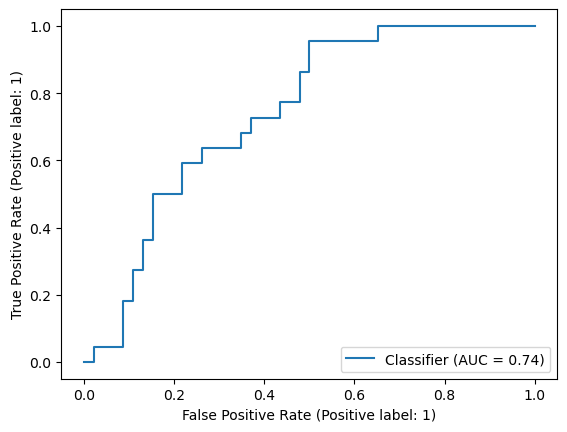

In [ ]:
# Predictions of model
RocCurveDisplay.from_predictions(y_val, val_predictions)

## Repartitions

In [ ]:
X_positive_train = X_train[y_train == 1]
X_negative_train = X_train[y_train == 0]

In [ ]:
all_positive_features = torch.Tensor(X_positive_train)
all_negative_features = torch.Tensor(X_negative_train)

all_positive_predict = model(all_positive_features).flatten()
all_negative_predict = model(all_negative_features).flatten()

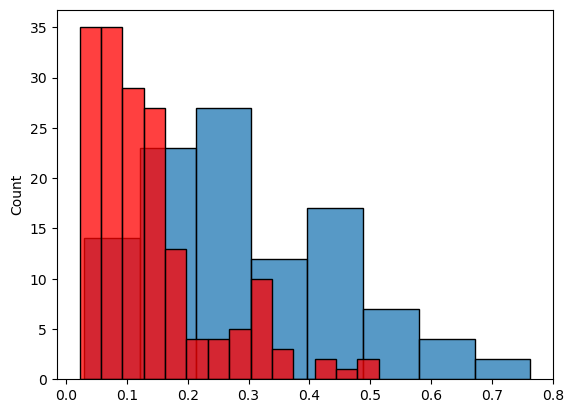

In [ ]:
sns.histplot(all_positive_predict.detach(), label="positive")
sns.histplot(all_negative_predict.detach(), label="negative", color="r")
plt.legend()
plt.show()